<a href="https://colab.research.google.com/github/fjpa121197/DataScienceDM/blob/master/time_series_lstm_explore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# imports
import pandas as pd
import numpy as np
from numpy import array, hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
np.random.seed(1234)
tf.random.set_seed(1234)
import keras
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from scipy import stats
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Example of data prepration and training LSTM (with random data)

## Example preparing data and training LSTM model only

In [ ]:
# Splits a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# Data generation and preparation

# Define input sequence
in_seq0 = array([1,2,3,4,5,6,7,8,9])
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq0 = in_seq0.reshape((len(in_seq0),1))
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq0,in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

In [ ]:
n_features = X.shape[2]
# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=200, verbose=0)

In [ ]:
# Prediction example
x_input = array([[8,80, 85], [9,90, 95], [10,100, 105]])
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)
print(yhat)

[[205.87677]]


## Example preparing data and training LSTM + FC NN

In [ ]:
# Splits a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# Data generation and preparation

# Define input sequence
in_seq0 = array([1,2,3,4,5,6,7,8,9])
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq0 = in_seq0.reshape((len(in_seq0),1))
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq0,in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

In [ ]:
X

array([[[ 1, 10, 15],
        [ 2, 20, 25],
        [ 3, 30, 35]],

       [[ 2, 20, 25],
        [ 3, 30, 35],
        [ 4, 40, 45]],

       [[ 3, 30, 35],
        [ 4, 40, 45],
        [ 5, 50, 55]],

       [[ 4, 40, 45],
        [ 5, 50, 55],
        [ 6, 60, 65]],

       [[ 5, 50, 55],
        [ 6, 60, 65],
        [ 7, 70, 75]],

       [[ 6, 60, 65],
        [ 7, 70, 75],
        [ 8, 80, 85]],

       [[ 7, 70, 75],
        [ 8, 80, 85],
        [ 9, 90, 95]]])

In [ ]:
y

array([ 65,  85, 105, 125, 145, 165, 185])

In [ ]:
time_invariant_data = np.array([[0.4,0.5,0.3],[0.3,0.2,0.1],[0.8,0.9,1.1],[1.4,1.9,0.2],[0.1,0.7,1.2],[0.3,0.2,0.3],[1.1,1.4,0.3]])

In [ ]:
lstm_input = keras.Input(
    shape=(3,3), name="lstm_input"
)  # Variable-length sequence of ints
pre_go_live_input = keras.Input(shape=(3,), name="pre-go-live")  # Variable-length sequence of ints
fc_pre_go_live_1 = keras.layers.Dense(400)(pre_go_live_input)

# Reduce sequence of embedded words in the title into a single 128-dimensional vector
lstm_features = LSTM(50)(lstm_input)

# Merge all available features into a single large vector via concatenation
x = keras.layers.concatenate([lstm_features, fc_pre_go_live_1])

fc_layer = keras.layers.Dense(100, name="fc_1")(x)
# Stick a department classifier on top of the features
pred = keras.layers.Dense(1, name="prediction_layer")(fc_layer)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[lstm_input, pre_go_live_input],
    outputs=[pred]
)

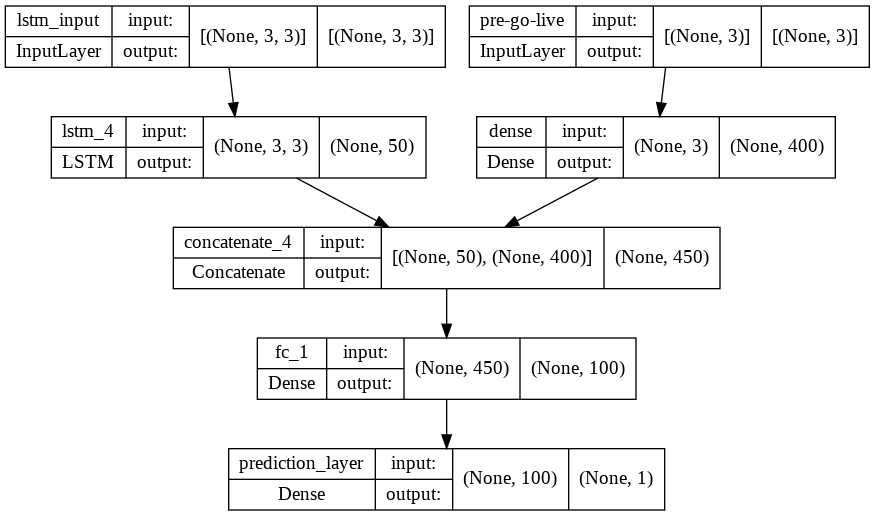

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit([X,time_invariant_data], y, epochs=400, verbose=1, validation_split=0.1)

Epoch 1/400
1/1 [==============================] - 4s 4s/step - loss: 6.7909e-11 - val_loss: 66.9140
Epoch 2/400
1/1 [==============================] - 0s 47ms/step - loss: 75.5654 - val_loss: 1.2456
Epoch 3/400
1/1 [==============================] - 0s 43ms/step - loss: 1.9175 - val_loss: 10.6501
Epoch 4/400
1/1 [==============================] - 0s 44ms/step - loss: 27.9194 - val_loss: 15.7008
Epoch 5/400
1/1 [==============================] - 0s 40ms/step - loss: 47.1899 - val_loss: 7.7557
Epoch 6/400
1/1 [==============================] - 0s 44ms/step - loss: 25.8698 - val_loss: 0.2150
Epoch 7/400
1/1 [==============================] - 0s 42ms/step - loss: 3.3550 - val_loss: 5.8315
Epoch 8/400
1/1 [==============================] - 0s 43ms/step - loss: 3.6775 - val_loss: 22.2062
Epoch 9/400
1/1 [==============================] - 0s 45ms/step - loss: 18.1861 - val_loss: 29.7156
Epoch 10/400
1/1 [==============================] - 0s 48ms/step - loss: 24.0819 - val_loss: 21.6085
Epoch

In [ ]:
# Prediction example
x_input = array([[8,80, 85], [9,90, 95], [10,100, 105]])
x_input = x_input.reshape((1, 3, 3))

x_input_1 = np.array([[0.4,0.5,0.3]])
yhat = model.predict([x_input,x_input_1], verbose=0)
print(yhat)

[[183.67154]]


## Example on initializing initial hidden states of LSTM model with a pre-defined vector

In [2]:
# Splits a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)
 
# Data generation and preparation

# Define input sequence
in_seq0 = array([1,2,3,4,5,6,7,8,9])
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
# convert to [rows, columns] structure
in_seq0 = in_seq0.reshape((len(in_seq0),1))
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq0,in_seq1, in_seq2, out_seq))
# choose a number of time steps
n_steps = 3
# convert into input/output
X, y = split_sequences(dataset, n_steps)

In [3]:
X

array([[[ 1, 10, 15],
        [ 2, 20, 25],
        [ 3, 30, 35]],

       [[ 2, 20, 25],
        [ 3, 30, 35],
        [ 4, 40, 45]],

       [[ 3, 30, 35],
        [ 4, 40, 45],
        [ 5, 50, 55]],

       [[ 4, 40, 45],
        [ 5, 50, 55],
        [ 6, 60, 65]],

       [[ 5, 50, 55],
        [ 6, 60, 65],
        [ 7, 70, 75]],

       [[ 6, 60, 65],
        [ 7, 70, 75],
        [ 8, 80, 85]],

       [[ 7, 70, 75],
        [ 8, 80, 85],
        [ 9, 90, 95]]])

In [4]:
y

array([ 65,  85, 105, 125, 145, 165, 185])

In [5]:
time_invariant_data = np.array([[0.4,0.5,0.3],[0.3,0.2,0.1],[0.8,0.9,1.1],[1.4,1.9,0.2],[0.1,0.7,1.2],[0.3,0.2,0.3],[1.1,1.4,0.3]])

In [15]:
lstm_input = keras.Input(
    shape=(3,3), name="lstm_input"
)  # Variable-length sequence of ints
pre_go_live_input_hidden_states = keras.Input(shape=(3,), name="pre-go-live")  # Variable-length sequence of ints


pre_go_live_fc_layer_1 = keras.layers.Dense(50, activation='relu')(pre_go_live_input_hidden_states)
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
lstm_features = LSTM(50)
outputs = lstm_features(lstm_input, initial_state=[pre_go_live_fc_layer_1,pre_go_live_fc_layer_1])

# Stick a department classifier on top of the features
pred = keras.layers.Dense(1, name="prediction_layer")(outputs)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[lstm_input, pre_go_live_input_hidden_states],
    outputs=[pred]
)

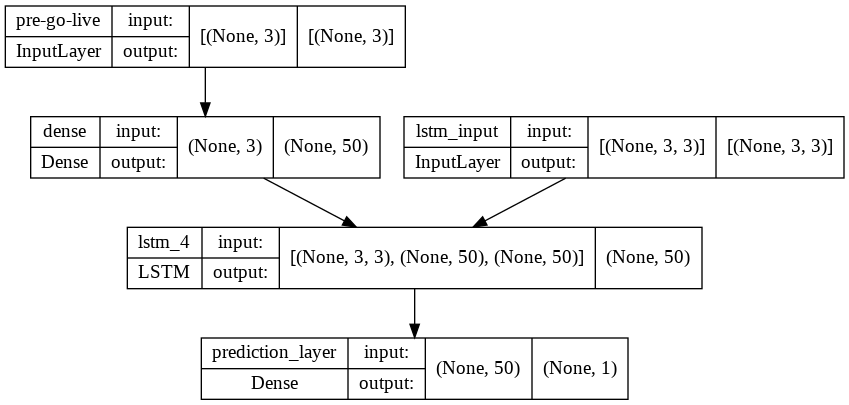

In [16]:
plot_model(model, show_shapes=True)

# Example using Strike dataset





## Data Preparation

This step consists on just preprocessing the property level data and offers of properties, such as filtering offers that are not be considered, replacing some missing values (which can be replaced), cleaning some columns from input errors, etc.

In [2]:
# Load property level data (contains info such as number_of_beds, etc)
df_properties_main = pd.read_csv(r"/content/agg_data_7days.csv")
df_properties_main.drop_duplicates(subset=['property_id'], inplace=True)
df_properties_main.shape
# Load post go live features/values for up to 7 days
df_properties_daily = pd.read_csv(r"/content/daily_values_7days.csv")
df_properties_daily.shape


## Preprocessing dataset with property level data
# Copy dataframe and change date features to correct format
df_properties = df_properties_main
df_properties['gl_date'] = pd.to_datetime(df_properties['gl_date'])
df_properties['gl_date_year'] = pd.DatetimeIndex(df_properties['gl_date']).year
df_properties['gl_date_month'] = df_properties['gl_date'].dt.month_name()
df_properties['cc_date'] = pd.to_datetime(df_properties['cc_date'])
# Drop epc_expire_date feature, this might be used later on, but need to analyze the impact of it, since this can be a factor for a property 
# to be off market.
df_properties.drop(labels=['epc_expiry_date'], axis=1,inplace=True)

# Remove rows with a higher and lower first listed price
# This might be useful for removing higher first listed prices, since the distribution is skewed to the right.
df_properties = df_properties[(np.abs(stats.zscore(df_properties['first_listed_price'])) < 4)]
df_properties = df_properties[df_properties['first_listed_price'] > 9000]

# Clean council tax band variable
def clean_council_tax_band(row):
  clean_tax_band = row.lower().replace("band ","").replace("#a", "a").replace("aa", "a")\
          .replace("b1200","b").replace("n/a","nan").replace("-","nan")

  if clean_tax_band in ['a','b','c','d','e','f','g']:
    return clean_tax_band
  else:
    return "unknown"

df_properties['council_tax_band'] = df_properties['council_tax_band'].astype(str)
df_properties['council_tax_band'] = df_properties['council_tax_band'].apply(clean_council_tax_band)

# Make the purchase products/services features into a int
# Replace incorrect values and missing values with 0
df_properties['prof_photos'].fillna(0, inplace=True)
df_properties['prof_photos'].replace(2,1,inplace=True)
df_properties['prof_photos'] = df_properties['prof_photos'].astype(int)

df_properties['digitial_marketing_pack'].fillna(0, inplace=True)
df_properties['digitial_marketing_pack'] = df_properties['digitial_marketing_pack'].astype(int)
df_properties['digitial_marketing_pack'].replace(2,1,inplace=True)

df_properties['premium_advert_ordered'].fillna(0, inplace=True)
df_properties['premium_advert_ordered'] = df_properties['premium_advert_ordered'].astype(int)
df_properties['premium_advert_ordered'].replace(2,1,inplace=True)

df_properties['bundle_ordered'].fillna(0, inplace=True)
df_properties['bundle_ordered'] = df_properties['bundle_ordered'].astype(int)
df_properties['bundle_ordered'].replace(2,1,inplace=True)


df_properties['hosted_viewings'].fillna(0, inplace=True)
df_properties['hosted_viewings'] = df_properties['hosted_viewings'].astype(int)
df_properties['hosted_viewings'].replace(2,1,inplace=True)

df_properties['viewing_pack_ordered'].fillna(0, inplace=True)
df_properties['viewing_pack_ordered'] = df_properties['viewing_pack_ordered'].astype(int)
df_properties['viewing_pack_ordered'].replace(2,1,inplace=True)


df_properties['new_build'].fillna(0, inplace=True)
df_properties['new_build'] = df_properties['new_build'].astype(int)

df_properties['strike_market_share_percent'].fillna(0, inplace=True)
df_properties['strike_market_share_percent'] = df_properties['strike_market_share_percent'].astype(float)

# There are properties which have been listed, but then cancelled for various reasons, not providing epc or simply cancelling
# Remove properties which have been listed for less than 14 days or did not receive any offer at all
df_properties['days_listed'] = df_properties['cc_date'] - df_properties['gl_date']
df_properties['days_listed'] = df_properties['days_listed'].dt.days
df_properties['days_listed'].fillna(180.0, inplace=True)
df_properties = df_properties[(df_properties['days_listed'] >= 14) | (df_properties['total_offers'] > 0)]
df_properties_ap = df_properties
df_properties_ap.drop(labels=['days_listed'], axis=1, inplace=True)

# Identify numerical and categorical variables
vars_num = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes != 'O') and (var != 'property_id' and var != 'user_id')]
vars_cat = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes == 'O')]

# Lower categorical features
for var in vars_cat:
    df_properties_ap[var] = df_properties_ap[var].str.lower()
    df_properties_ap[var] = df_properties_ap[var].str.replace(" ","_")
    # df_properties_ap[var].fillna('other', inplace=True)


# Load offers dataset in order to filter out offers
# Contains information about actual offers made for each property in property dataset
df_offers = pd.read_csv(r"/content/offers_data_all.csv")
# Drop record of properties that did not get an offer at all
df_offers_true = df_offers[~df_offers['days_listing_to_offer_recieved'].isnull()]
# Drop samples that have a negative value input in days_listing_to_offer_recieved and also the offers received after 180 days (6 months)
# Not sure why there are properties with negative values in day_listing_to_offer_recieved
df_offers_true =df_offers_true[(df_offers_true.days_listing_to_offer_recieved >= 0) & (df_offers_true.days_listing_to_offer_recieved <180)]

# Convert days_listing_to_offer_recieved to int, to be able to sort out for getting unique offers
df_offers_true['days_listing_to_offer_recieved'] = df_offers_true['days_listing_to_offer_recieved'].astype(int)

# Calculate difference in percentage between features (offer price vs asking price, and first_listed_price vs listed_price_when_offer)
def percentage_change(col1,col2):
    return round(((col2 - col1)/ col1) * 100,2)

# Compute the difference between a listed price when offer (property asking price at that moment) vs what a buyer offers for it
df_offers_true['diff_offer_vs_price'] = percentage_change(df_offers_true['listed_price_when_offer'],df_offers_true['offer_price'])
# Drop offers that have a -50% or more difference between asking price and offer price
df_offers_true_merged = df_offers_true[np.abs(df_offers_true['diff_offer_vs_price']) <= 50]
# Drop offers with the same offer_id value, not sure why the query gives more offers (duplicated), might be the query and its left joins.
df_offers_true_merged.drop_duplicates(subset=['offer_id'], inplace=True)



# Take the latest offer from a buyer. A buyer might offer more than once (either because the previous is withdrawn or rejected). Only consider the latest offer.

# Sort offers received by each property by date received and buyer, only keep latest one
unique_offers = df_offers_true_merged[['property_id','buyer_user_id','offer_id','days_listing_to_offer_recieved']].sort_values('days_listing_to_offer_recieved').drop_duplicates(['property_id','buyer_user_id'], keep='last')
unique_offers_join_prop = unique_offers.groupby(['property_id']).size().reset_index()
unique_offers_join_prop.rename(columns={0:'unique_offers'}, inplace=True)
# Join unique number of offers with the property aggregated dataset which contains property level features
df_properties_ap = df_properties_ap.merge(unique_offers_join_prop, on = 'property_id', how='left')
df_properties_ap['unique_offers'].fillna(0, inplace=True)
df_properties_ap['unique_offers'] = df_properties_ap['unique_offers'].astype(int)

# Do not count  offers that are -13.31 lower than the asking price, or are not marked as complete
df_offers_true_merged = df_offers_true_merged[~((df_offers_true_merged['diff_offer_vs_price'] < -13.31) & (df_offers_true_merged['offer_status'] != 'complete'))]
df_offers_true_merged = df_offers_true_merged.merge(unique_offers['offer_id'],
                                                on='offer_id', how='inner')
unique_offers_join_prop = df_offers_true_merged.groupby(['property_id']).size().reset_index()
unique_offers_join_prop.rename(columns={0:'unique_offers_cut'}, inplace=True)
df_properties_ap = df_properties_ap.merge(unique_offers_join_prop, on = 'property_id', how='left')
df_properties_ap['unique_offers_cut'].fillna(0, inplace=True)
df_properties_ap['unique_offers_cut'] = df_properties_ap['unique_offers_cut'].astype(int)

df_properties_ap['unique_offers_cut'] = np.where(df_properties_ap['offers_received_7days'] > df_properties_ap['unique_offers_cut'], df_properties_ap['unique_offers'], df_properties_ap['unique_offers_cut'])
# Partially validate filtering of number of offers was done correct
test = df_properties_ap
assert len(test[test['unique_offers'] > test['total_offers']]) == 0
assert len(test[test['unique_offers_cut'] > test['unique_offers']]) == 0
# Preprocessing on specific features that have odd values
df_properties_ap = df_properties_ap[df_properties_ap['build_year'] > 1800]
df_properties_ap['build_year_group'] = np.where(df_properties_ap['build_year'] == 2000, 'post_2000',df_properties_ap['build_year_group'])
df_properties_ap.drop(labels=['unique_offers','total_offers', 'cc_date','sq_ft','council_tax_cost', 'strike_agent','key_features'], axis=1,inplace=True)
print(df_properties_ap.shape)
# Identify numerical and categorical variables
vars_num = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes != 'O') and (var != 'property_id' and var != 'user_id')]
vars_cat = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes == 'O') and (var != 'gl_date' and var != 'cc_date')]

# Check for missing values in each feature
vars_num_na = [var for var in vars_num if df_properties_ap[var].isnull().sum() > 0]
print('Numerical features missing values report:')
print(df_properties_ap[vars_num_na].isnull().mean().sort_values(ascending=False))
print('\n')
print('Categorical features missing values report:')
vars_cat_na = [var for var in vars_cat if df_properties_ap[var].isnull().sum() > 0]
print(df_properties_ap[vars_cat_na].isnull().mean().sort_values(ascending=False))
df_properties_ap['avgprice_sim_strike_ppts_ol'] = np.where(df_properties_ap['avgprice_sim_strike_ppts_ol'].isnull(), 
                                                            df_properties_ap['first_listed_price'],df_properties_ap['avgprice_sim_strike_ppts_ol'])

df_properties_ap['avg_rm_views_sim_strike_ppts_ol'] = np.where(df_properties_ap['avg_rm_views_sim_strike_ppts_ol'].isnull(), 
                                                            0,df_properties_ap['avg_rm_views_sim_strike_ppts_ol'])
# Identify numerical and categorical variables
vars_num = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes != 'O') and (var != 'property_id' and var != 'user_id')]
vars_cat = [var for var in df_properties_ap.columns if (df_properties_ap[var].dtypes == 'O') and (var != 'gl_date' and var != 'cc_date')]

(30954, 88)
Numerical features missing values report:
avg_rm_views_sim_strike_ppts_ol    0.171577
avgprice_sim_strike_ppts_ol        0.171028
avg_price_3months                  0.000032
avg_hpi_index_3months              0.000032
avg_monthly_change_3months         0.000032
avg_annual_change_3months          0.000032
dtype: float64


Categorical features missing values report:
double_glazing            0.009240
county                    0.002552
urban_rural_category      0.000485
strike_defined_channel    0.000291
parking_type              0.000032
listing_pricetype         0.000032
dtype: float64


In [3]:
## Preprocessing dataset with daily values
# There are some features that can be enginer from the current daily values, such as cummulative sum of daily values, extracting the year, month and day from date, etc.
# Cummulative sum
df_properties_daily['vr_daily_cumsum'] = df_properties_daily.groupby('property_id').vr_daily.cumsum()
df_properties_daily['vc_daily_cumsum'] = df_properties_daily.groupby('property_id').vc_daily.cumsum()
df_properties_daily['rm_summary_views_daily_cumsum'] = df_properties_daily.groupby('property_id').rm_summary_views_daily.cumsum()
df_properties_daily['rm_detailed_views_daily_cumsum'] = df_properties_daily.groupby('property_id').rm_detailed_views_daily.cumsum()
df_properties_daily['sim_ppts_ol_listed_daily_cumsum'] = df_properties_daily.groupby('property_id').sim_ppts_ol_listed_daily.cumsum()
df_properties_daily['sim_ppts_ol_stc_daily_cumsum'] = df_properties_daily.groupby('property_id').sim_ppts_ol_stc_daily.cumsum()
df_properties_daily['offers_recieved_daily_cumsum'] = df_properties_daily.groupby('property_id').offers_recieved_daily.cumsum()

# Extract features from date of reporting column
df_properties_daily['date_of_reporting'] = pd.to_datetime(df_properties_daily['date_of_reporting'])
df_properties_daily['year'] = df_properties_daily['date_of_reporting'].dt.year
df_properties_daily['month'] = df_properties_daily['date_of_reporting'].dt.month
df_properties_daily['day'] = df_properties_daily['date_of_reporting'].dt.day
df_properties_daily = df_properties_daily[['property_id','year','month','day','days_since_live','vr_daily_cumsum','vc_daily_cumsum',
                                           'price_change_percentage_daily','rm_summary_views_daily_cumsum','rm_detailed_views_daily_cumsum',
                                           'premium_listing_daily','featured_property_daily',
                                           'sim_ppts_ol_listed_daily_cumsum','sim_ppts_ol_stc_daily_cumsum','offers_recieved_daily_cumsum']]

## Using only the daily values

For this part, only information about the daily values will be used for training, only features such as number of viewings request/completed, price changes, rightmove  views after property has gone live will be included.

It would not have any context/information related to the property level data.

In [4]:
# Merging with property level dataframe to get the total number of offers received within 6 months for each property
final_df = pd.merge(df_properties_daily, df_properties_ap[['property_id','unique_offers_cut']], how="inner", on=['property_id'])
final_df_1 = final_df.drop(['property_id'], axis=1)

In [5]:
# Lets transform the dataset (which is in a pandas df, to a numpy array)
dataset_features = final_df_1.drop(['unique_offers_cut'],axis=1).to_numpy()

# Since each property has 7 rows, representing 7 days of being live, they will need to be group in a 3-d array in order to be splitted later on into train, validation 
# and test data, and be giving to the model. The shape should be (unique_properties, timesteps, features)
X = dataset_features.reshape(len(final_df['property_id'].unique()),7,14)

# Additionally, we will need the target variable, which is this case, it will be the total number of offers within 6 months
y = final_df[['property_id','unique_offers_cut']]
y.drop_duplicates(subset=['property_id'], inplace=True)
y = y['unique_offers_cut'].to_numpy()

In [6]:
# Lets train test split the data (this will be done twice), so there is also a validation set used while training to detect under/over fitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=14)

In [7]:
# Before initializing training, we will standarize and normalize our data.
scaler = RobustScaler()

In [8]:
# In order to use an scaler/transformer, data needs to be in a 2-d shape, and our current data is in 3-d
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_train_df.columns = final_df_1.columns[0:-1] # Just adding original column names (not really needed, used for reference)

# Using scaler to normalize data
X_train_df_encoded = pd.DataFrame(scaler.fit_transform(X_train_df))
X_train_df_encoded.columns = scaler.get_feature_names_out()
X_train = X_train_df_encoded.to_numpy()
X_train = X_train.reshape(int(X_train.shape[0] / 7), 7, X_train.shape[1]) # Reshaping data from 2-d to 3-d

In [9]:
# Doing same above process but with validation data and using fitted scaler to only transform data
X_val_df = pd.DataFrame(X_val.reshape(X_val.shape[0]*X_val.shape[1], X_val.shape[2]))
X_val_df.columns = final_df_1.columns[0:-1]
X_val_df_encoded = pd.DataFrame(scaler.transform(X_val_df))
X_val = X_val_df_encoded.to_numpy()
X_val = X_val.reshape(int(X_val.shape[0] / 7), 7, X_val.shape[1])

In [10]:
# Defining LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7, X_train.shape[2]))) # Input shape is n_timesteps, n_features
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# EarlyStopping callback to stop training if validation loss does not decrease after certain # of epochs
callback = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# fit model
model.fit(X_train, y_train, epochs=40, verbose=1, validation_data=(X_val, y_val), callbacks = [callback]) # Using validation data so after each epoch, model evaluates and gives results

Epoch 1/40
740/740 [==============================] - 13s 13ms/step - loss: 2.9093 - val_loss: 2.3350
Epoch 2/40
740/740 [==============================] - 10s 13ms/step - loss: 2.5461 - val_loss: 2.2901
Epoch 3/40
740/740 [==============================] - 10s 13ms/step - loss: 2.5058 - val_loss: 2.2874
Epoch 4/40
740/740 [==============================] - 10s 14ms/step - loss: 2.4919 - val_loss: 2.4186
Epoch 5/40
740/740 [==============================] - 10s 13ms/step - loss: 2.4680 - val_loss: 2.2870
Epoch 6/40
740/740 [==============================] - 10s 13ms/step - loss: 2.4492 - val_loss: 2.2846
Epoch 7/40
740/740 [==============================] - 10s 13ms/step - loss: 2.4237 - val_loss: 2.3557
Epoch 8/40
740/740 [==============================] - 10s 13ms/step - loss: 2.4186 - val_loss: 2.2791
Epoch 9/40
740/740 [==============================] - 11s 14ms/step - loss: 2.3908 - val_loss: 2.3021
Epoch 10/40
740/740 [==============================] - 10s 14ms/step - loss: 2.361

In [11]:
# Evaluating model with test data
# Using same scaler to normalize features
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
X_test_df.columns = final_df_1.columns[0:-1]
X_test_df_encoded = pd.DataFrame(scaler.transform(X_test_df))
X_test = X_test_df_encoded.to_numpy()
X_test = X_test.reshape(int(X_test.shape[0] / 7), 7, X_test.shape[1])

In [12]:
# Getting predictions
preds = model.predict(X_test)

# Evaluating results
print("MAE: %s" % mean_absolute_error(y_test, preds))
print("MSE: %s" % mean_squared_error(y_test, preds))
print("RMSE: %s" % mean_squared_error(y_test, preds, squared=False))
print("R2: %s" % r2_score(y_test, preds))

MAE: 1.0983653458687224
MSE: 2.6264564254926728
RMSE: 1.6206345749405302
R2: 0.5063983300240783


## Using daily values + property level data duplicated

In the previous section, only daily values were used, and no context about the property was introduced. For this part, information about the information such as number of beds, first listed price, marketing products acquired, market data, information on similar strike properties will be introduced.

In order to introduce this information, there are 3 approaches, 2 of them are showned in the following diagram.

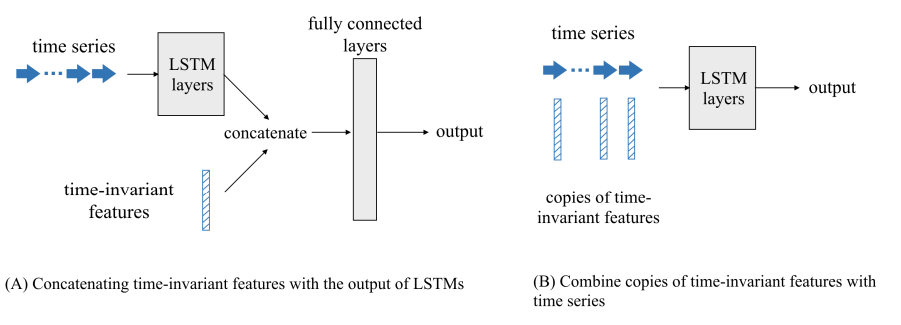

The following part will use approach 2 (B), where the property level information will be duplicated 7 times and added to the daily values. See below for example of how it will look.

In [15]:
# Defining names of categorical, numerical and daily values (post-go live features) features
vars_num = ['number_of_beds','no_of_bathrooms','no_of_receptions','land','new_build','build_year',
            'epc_exempt','virtual_visit','prof_photos','digitial_marketing_pack','can_have_board',
            'premium_advert_ordered','bundle_ordered','hosted_viewings','viewing_pack_ordered',
            'strike_market_share_percent','first_listed_price','population_in_area','population_density',
            'income_decile','populated_area','pop_area_with_gospace_access','pct_pop_area_with_gospace_access',
            'pct_pop_area_without_gospace_access','pop_without_gospace_access','average_demand_trend_6weeks',
            'avg_sales_quarter_3qts','avg_median_pricepaid_3qts',	'avg_price_3months','avg_hpi_index_3months',
            'avg_monthly_change_3months','avg_annual_change_3months','no_sim_ppts_ol',
            'avgweeks_inmarket_sim_ppts_ol','avgprice_sim_ppts_ol','medianprice_sim_ppts_ol',
            'no_sim_ppts_ol_stc','avgweeks_to_stc_sim_ppts_ol_stc','avgprice_sim_ppts_ol_stc',
            'medianprice_sim_ppts_ol_stc','no_sim_strike_ppts_ol','avgprice_sim_strike_ppts_ol', 
            'avg_offers_sim_strike_ppts_ol','avg_vr_sim_strike_ppts_ol','avg_vc_sim_strike_ppts_ol']

vars_cat = ['property_type','build_year_group','tenure_type','heating_type','double_glazing','parking_type','garden','council_tax_band','itv_region','urban_rural_category','county',
            'rural_ubran_classification_detail_lsoa','rural_urban_classification_detail_msoa','spatial_signature_type','chain_situation','strike_defined_channel','listing_pricetype',
            'gl_date_month']

daily_values_vars = ['year','month','day','days_since_live','vr_daily_cumsum','vc_daily_cumsum',
                     'price_change_percentage_daily','rm_summary_views_daily_cumsum','rm_detailed_views_daily_cumsum',
                     'premium_listing_daily','featured_property_daily',
                     'sim_ppts_ol_listed_daily_cumsum','sim_ppts_ol_stc_daily_cumsum',
                     'offers_recieved_daily_cumsum']

target = ['unique_offers_cut']

In [16]:
# Merging pre-go live features with post go live (daily values) features datasets
final_df = pd.merge(df_properties_daily,df_properties_ap[['property_id']+vars_num + vars_cat + target], how="inner", on=['property_id'])
final_df.head(14)

,property_id,year,month,day,days_since_live,vr_daily_cumsum,vc_daily_cumsum,price_change_percentage_daily,rm_summary_views_daily_cumsum,rm_detailed_views_daily_cumsum,...,urban_rural_category,county,rural_ubran_classification_detail_lsoa,rural_urban_classification_detail_msoa,spatial_signature_type,chain_situation,strike_defined_channel,listing_pricetype,gl_date_month,unique_offers_cut
0,33901,2018,1,17,0,0,0,0.0,409,33,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
1,33901,2018,1,18,1,1,0,0.0,1678,100,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
2,33901,2018,1,19,2,3,0,0.0,2363,156,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
3,33901,2018,1,20,3,3,0,0.0,3069,196,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
4,33901,2018,1,21,4,3,0,0.0,3735,234,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
5,33901,2018,1,22,5,3,0,0.0,4383,263,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
6,33901,2018,1,23,6,3,1,0.0,4949,298,...,urban,london,urban_major_conurbation,urban_major_conurbation,dense_residential_neighbourhoods,no_chain,direct,guide,january,1
7,36484,2018,3,23,0,0,0,0.0,1233,146,...,urban,merseyside,urban_major_conurbation,urban_major_conurbation,urban_buffer,no_chain,NaN,over,march,0
8,36484,2018,3,24,1,0,0,0.0,3983,322,...,urban,merseyside,urban_major_conurbation,urban_major_conurbation,urban_buffer,no_chain,NaN,over,march,0
9,36484,2018,3,25,2,0,0,0.0,5335,400,...,urban,merseyside,urban_major_conurbation,urban_major_conurbation,urban_buffer,no_chain,NaN,over,march,0


In [17]:
final_df_1 = final_df.drop(['property_id'], axis=1)
final_df_1.shape

(216678, 78)

In [18]:
# Lets transform the dataset (which is in a pandas df, to a numpy array)
dataset_features = final_df_1.drop(['unique_offers_cut'],axis=1).to_numpy()

# Since each property has 7 rows, representing 7 days of being live, they will need to be group in a 3-d array in order to be splitted later on into train, validation and test data.
X = dataset_features.reshape(int(final_df_1.shape[0] / 7),7,final_df_1.shape[1]-1)

# Additionally, we will need the target variable, which is this case, it will be the total number of offers within 6 months
y = final_df[['property_id','unique_offers_cut']]
y.drop_duplicates(subset=['property_id'], inplace=True)
y = y['unique_offers_cut'].to_numpy()

In [19]:
# Lets train test split the data, we will have the test set, which will be used for evaluating only
# And also the train and validation set, where the validation set will be used during training only to see if the
# model is overfitting and tune the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=14)

In [20]:
# Since we are introducing new variables (where some have missing values), numerical and categorical, we will need to use additional transformations, 
# such as one-hot-encoding for categorical features, and imputation for missing values.

numeric_preprocessor = Pipeline(
        steps = [
            ('imputation_mean', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]
    )

daily_values_preprocessor = Pipeline(
        steps = [
            ('imputation_mean', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]
    )

categorical_preprocessor = Pipeline(
        steps = [
            ('imputation_mode', SimpleImputer(strategy='most_frequent')),
            ('ohe',OneHotEncoder(handle_unknown='ignore', sparse=False))
            
        ]
    )

preprocessor = ColumnTransformer([
                                  ('cat_preprocessor', categorical_preprocessor, vars_cat),
                                  ('num_preprocessor', numeric_preprocessor, vars_num),
                                  ('dv_preprocessor', daily_values_preprocessor, daily_values_vars)], 
                                 sparse_threshold= 0, remainder='passthrough')


In [21]:
# In order to use an scaler/transformer, data needs to be in a 2-d shape, and our current data is in 3-d
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_train_df.columns = final_df_1.columns[0:-1] # Just adding original column names (not really needed, just for reference)

# Using transformer to fit and transform training data
train_df_encoded = preprocessor.fit_transform(X_train_df)

X_train_df_encoded = pd.DataFrame(train_df_encoded)

# Following 4 lines are optional
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)
X_train_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names]

# Reshaping data into 3-d shape
X_train = X_train_df_encoded.to_numpy()
X_train = X_train.reshape(int(X_train.shape[0] / 7), 7, X_train.shape[1]) # Reshaping data from 2-d to 3-d

In [22]:
# Doing same above process but with validation data and using fitted scaler to only transform data
X_val_df = pd.DataFrame(X_val.reshape(X_val.shape[0]*X_val.shape[1], X_val.shape[2]))
X_val_df.columns = final_df_1.columns[0:-1]
X_val_df_encoded = pd.DataFrame(preprocessor.transform(X_val_df))

# Optional
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)
X_val_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names]

# Reshaping data into 3-d shape
X_val = X_val_df_encoded.to_numpy()
X_val = X_val.reshape(int(X_val.shape[0] / 7), 7, X_val.shape[1])

In [23]:
# Defining LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(7, X_train.shape[2]))) # Input shape is n_timesteps, n_features
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# EarlyStopping callback to stop training if validation loss does not decrease after certain # of epochs
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
# fit model
model.fit(X_train, y_train, epochs=100, verbose=1, validation_data=(X_val, y_val), callbacks = [callback]) # Using validation data so after each epoch, model evaluates and gives results

Epoch 1/100
740/740 [==============================] - 11s 14ms/step - loss: 3.0977 - val_loss: 2.2600
Epoch 2/100
740/740 [==============================] - 10s 14ms/step - loss: 2.4804 - val_loss: 2.3602
Epoch 3/100
740/740 [==============================] - 10s 13ms/step - loss: 2.6350 - val_loss: 2.2698
Epoch 4/100
740/740 [==============================] - 10s 13ms/step - loss: 2.3433 - val_loss: 2.3976
Epoch 5/100
740/740 [==============================] - 10s 14ms/step - loss: 2.2589 - val_loss: 2.3131
Epoch 6/100
740/740 [==============================] - 10s 14ms/step - loss: 2.1539 - val_loss: 2.3292
Epoch 7/100
740/740 [==============================] - 11s 14ms/step - loss: 2.0677 - val_loss: 2.2999
Epoch 8/100
740/740 [==============================] - 10s 14ms/step - loss: 1.9925 - val_loss: 2.3557
Epoch 9/100
740/740 [==============================] - 10s 14ms/step - loss: 1.8323 - val_loss: 2.5093
Epoch 10/100
740/740 [==============================] - 10s 14ms/step - l

In [24]:
# Evaluating model with test data
# Using same scaler to normalize features
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
X_test_df.columns = final_df_1.columns[0:-1]


X_test_df_encoded = pd.DataFrame(preprocessor.transform(X_test_df))
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)


X_test_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names]
X_test = X_test_df_encoded.to_numpy()
X_test = X_test.reshape(int(X_test.shape[0] / 7), 7, X_test.shape[1])

In [25]:
# Getting predictions
preds = model.predict(X_test)

# Evaluating results
print("MAE: %s" % mean_absolute_error(y_test, preds))
print("MSE: %s" % mean_squared_error(y_test, preds))
print("RMSE: %s" % mean_squared_error(y_test, preds, squared=False))
print("R2: %s" % r2_score(y_test, preds))

MAE: 1.0417224277503963
MSE: 2.683410442742435
RMSE: 1.638111852939974
R2: 0.49569470754877054


It seems that adding duplicated information/context about the property doesn't help in improving all metrics. In terms of MSE and R2, there was not improvement, however, there was a slight improvement in MAE.

## Using daily values + property level data (not duplicated)

Based on the previous image, the following part will focus on recreating approach 1 (A), which will concatenate the output of the LSTM model with the time invariant data (property level data) and give an output at the end.

In [26]:
# Define name of features and separate them by categorical, numerical and daily values
vars_num = ['number_of_beds','no_of_bathrooms','no_of_receptions','land','new_build','build_year',
            'epc_exempt','virtual_visit','prof_photos','digitial_marketing_pack','can_have_board',
            'premium_advert_ordered','bundle_ordered','hosted_viewings','viewing_pack_ordered',
            'strike_market_share_percent','first_listed_price','population_in_area','population_density',
            'income_decile','populated_area','pop_area_with_gospace_access','pct_pop_area_with_gospace_access',
            'pct_pop_area_without_gospace_access','pop_without_gospace_access','average_demand_trend_6weeks',
            'avg_sales_quarter_3qts','avg_median_pricepaid_3qts',	'avg_price_3months','avg_hpi_index_3months',
            'avg_monthly_change_3months','avg_annual_change_3months','no_sim_ppts_ol',
            'avgweeks_inmarket_sim_ppts_ol','avgprice_sim_ppts_ol','medianprice_sim_ppts_ol',
            'no_sim_ppts_ol_stc','avgweeks_to_stc_sim_ppts_ol_stc','avgprice_sim_ppts_ol_stc',
            'medianprice_sim_ppts_ol_stc','no_sim_strike_ppts_ol','avgprice_sim_strike_ppts_ol', 
            'avg_offers_sim_strike_ppts_ol','avg_vr_sim_strike_ppts_ol','avg_vc_sim_strike_ppts_ol']

vars_cat = ['property_type','build_year_group','tenure_type','heating_type','double_glazing','parking_type','garden','council_tax_band','itv_region','urban_rural_category','county',
            'rural_ubran_classification_detail_lsoa','rural_urban_classification_detail_msoa','spatial_signature_type','chain_situation','strike_defined_channel','listing_pricetype',
            'gl_date_month']

daily_values_vars = ['year','month','day','days_since_live','vr_daily_cumsum','vc_daily_cumsum',
                     'price_change_percentage_daily','rm_summary_views_daily_cumsum','rm_detailed_views_daily_cumsum',
                     'premium_listing_daily','featured_property_daily',
                     'sim_ppts_ol_listed_daily_cumsum','sim_ppts_ol_stc_daily_cumsum',
                     'offers_recieved_daily_cumsum']

target = ['unique_offers_cut']

In [27]:
# Merge two dataset
final_df_1 = pd.merge(df_properties_daily,df_properties_ap[['property_id']+vars_num + vars_cat + target], how="inner", on=['property_id'])
final_df_1.shape

(216678, 79)

In [28]:
# Lets transform the dataset (which is in a pandas df, to a numpy array)
dataset_features = final_df_1.drop(['unique_offers_cut'],axis=1).to_numpy()

# Since each property has 7 rows, representing 7 days of being live, they will need to be group in a 3-d array in order to be splitted later on into train, validation and test data.
X = dataset_features.reshape(int(final_df_1.shape[0] / 7),7,final_df_1.shape[1]-1)

# Additionally, we will need the target variable, which is this case, it will be the total number of offers within 6 months
y = final_df_1[['property_id','unique_offers_cut']]
y.drop_duplicates(subset=['property_id'], inplace=True)
y = y['unique_offers_cut'].to_numpy()

In [29]:
# Lets train test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=14)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=14)

In [30]:
# Since we are introducing new variables (where some have missing values), numerical and categorical, we will need to use additional transformations, 
# such as one-hot-encoding for categorical features, and imputation for missing values.
numeric_preprocessor = Pipeline(
        steps = [
            ('imputation_mean', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]
    )

daily_values_preprocessor = Pipeline(
        steps = [
            ('imputation_mean', SimpleImputer(strategy='mean')),
            ('scaler', RobustScaler())
        ]
    )

categorical_preprocessor = Pipeline(
        steps = [
            ('imputation_mode', SimpleImputer(strategy='most_frequent')),
            ('ohe',OneHotEncoder(handle_unknown='ignore', sparse=False))
            
        ]
    )

preprocessor = ColumnTransformer([
                                  ('cat_preprocessor', categorical_preprocessor, vars_cat),
                                  ('num_preprocessor', numeric_preprocessor, vars_num),
                                  ('dv_preprocessor', daily_values_preprocessor, daily_values_vars)], 
                                 sparse_threshold= 0, remainder='passthrough')


In [31]:
# In order to use ColumnTransformer, data needs to be in a 2-d shape, and our current data is in 3-d
X_train_df = pd.DataFrame(X_train.reshape(X_train.shape[0]*X_train.shape[1], X_train.shape[2]))
X_train_df.columns = final_df_1.columns[0:-1] # Just adding original column names (not really needed, just for reference)

#Using ColumnTransformer, and applying transformation to columns in dataset
train_df_encoded = preprocessor.fit_transform(X_train_df)
X_train_df_encoded = pd.DataFrame(train_df_encoded)

# Following 4 lines optional
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)
X_train_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names,*['property_id']]

# Separating pre-go live data and post go live data
# Post go live data
X_train_df_encoded_daily_values = X_train_df_encoded[daily_values_vars]

X_train_df_encoded_daily_values = X_train_df_encoded_daily_values.to_numpy()
X_train_df_encoded_daily_values = X_train_df_encoded_daily_values.reshape(int(X_train_df_encoded_daily_values.shape[0] / 7), 7, X_train_df_encoded_daily_values.shape[1]) # Reshaping data from 2-d to 3-d
print(X_train_df_encoded_daily_values.shape)
# Pre go live data
X_train_df_encoded_pre_go_live = X_train_df_encoded[[*encoded_categorical_columns_names,*numerical_columns_names] + ['property_id']]
X_train_df_encoded_pre_go_live.drop_duplicates(subset=['property_id'], inplace=True)

X_train_df_encoded_pre_go_live = X_train_df_encoded_pre_go_live.to_numpy()
print(X_train_df_encoded_pre_go_live.shape)

(23679, 7, 14)
(23679, 264)


In [32]:
# Doing same above process but with validation data and using fitted scaler to only transform data
X_val_df = pd.DataFrame(X_val.reshape(X_val.shape[0]*X_val.shape[1], X_val.shape[2]))
X_val_df.columns = final_df_1.columns[0:-1]
X_val_df_encoded = pd.DataFrame(preprocessor.transform(X_val_df))

# Optional
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)
X_val_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names,*['property_id']]

# Separating pre-go live data and post go live data
# Post go live data
X_val_df_encoded_daily_values = X_val_df_encoded[daily_values_vars]

X_val_df_encoded_daily_values = X_val_df_encoded_daily_values.to_numpy()
X_val_df_encoded_daily_values = X_val_df_encoded_daily_values.reshape(int(X_val_df_encoded_daily_values.shape[0] / 7), 7, X_val_df_encoded_daily_values.shape[1]) # Reshaping data from 2-d to 3-d
print(X_val_df_encoded_daily_values.shape)

# Pre go live data
X_val_df_encoded_pre_go_live = X_val_df_encoded[[*encoded_categorical_columns_names,*numerical_columns_names] + ['property_id']]
X_val_df_encoded_pre_go_live.drop_duplicates(subset=['property_id'], inplace=True)

X_val_df_encoded_pre_go_live = X_val_df_encoded_pre_go_live.to_numpy()
print(X_val_df_encoded_pre_go_live.shape)

(4179, 7, 14)
(4179, 264)


In [33]:
# At some previous point, the data type of the values changed, changing to float32 so is compatible with model
X_train_df_encoded_daily_values = np.asarray(X_train_df_encoded_daily_values).astype('float32')
X_val_df_encoded_daily_values = np.asarray(X_val_df_encoded_daily_values).astype('float32')

X_train_df_encoded_pre_go_live = np.asarray(X_train_df_encoded_pre_go_live).astype('float32')
X_val_df_encoded_pre_go_live = np.asarray(X_val_df_encoded_pre_go_live).astype('float32')

In [34]:
# Define inputs of the model
lstm_input = keras.Input(shape=(7,14), name="lstm_input")
pre_go_live_input = keras.Input(shape=(264,), name="pre-go-live")

# Define layers for each type of input - LSTM for lstm input and FCL for pre-go-live input 

lstm_features = LSTM(50,activation='relu')(lstm_input)


# Merge all available features into a single large vector via concatenation
x = keras.layers.concatenate([lstm_features, pre_go_live_input])

fc_layer = keras.layers.Dense(100, name="fc_1", activation='relu')(x)
# Stick a department classifier on top of the features
pred = keras.layers.Dense(1, name="prediction_layer")(fc_layer)

# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(
    inputs=[lstm_input, pre_go_live_input],
    outputs=[pred]
)

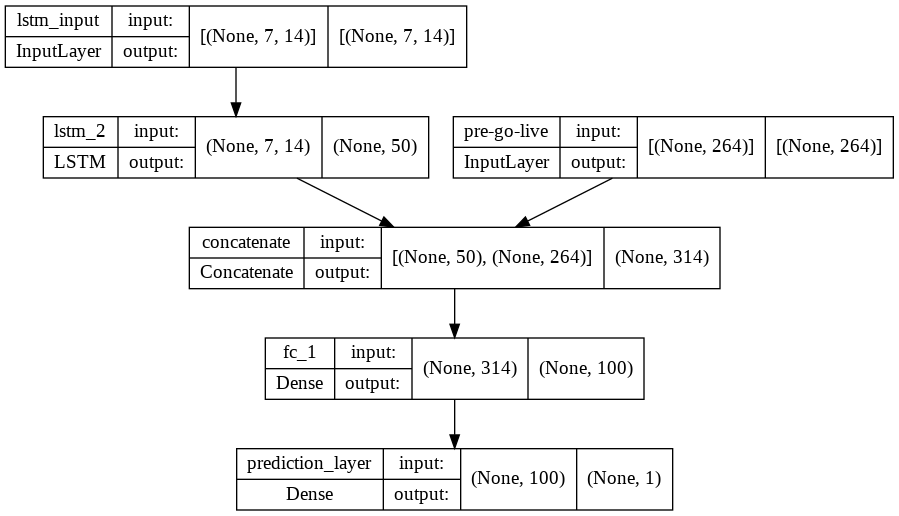

In [35]:
plot_model(model, show_shapes=True)

In [36]:
callback = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
model.compile(optimizer = tf.keras.optimizers.Adam(), loss='mse')
# fit model
model.fit([X_train_df_encoded_daily_values,X_train_df_encoded_pre_go_live], y_train, epochs=400, callbacks = [callback], 
          validation_data = ([X_val_df_encoded_daily_values,X_val_df_encoded_pre_go_live], y_val),verbose=1)

Epoch 1/400
740/740 [==============================] - 13s 16ms/step - loss: 14881.7490 - val_loss: 4.4901
Epoch 2/400
740/740 [==============================] - 10s 14ms/step - loss: 4.9071 - val_loss: 2.7588
Epoch 3/400
740/740 [==============================] - 10s 14ms/step - loss: 9.5463 - val_loss: 2.4581
Epoch 4/400
740/740 [==============================] - 10s 13ms/step - loss: 1115.5031 - val_loss: 1272.9198
Epoch 5/400
740/740 [==============================] - 10s 14ms/step - loss: 2375.5471 - val_loss: 50.1005
Epoch 6/400
740/740 [==============================] - 10s 14ms/step - loss: 109.6881 - val_loss: 4.5153
Epoch 7/400
740/740 [==============================] - 10s 14ms/step - loss: 2073.1572 - val_loss: 6688.2075
Epoch 8/400
740/740 [==============================] - 10s 14ms/step - loss: 432.1791 - val_loss: 332.7870
Epoch 9/400
740/740 [==============================] - 11s 15ms/step - loss: 1218.4323 - val_loss: 90.9809
Epoch 10/400
740/740 [=====================

In [37]:
# Preparing test data
X_test_df = pd.DataFrame(X_test.reshape(X_test.shape[0]*X_test.shape[1], X_test.shape[2]))
X_test_df.columns = final_df_1.columns[0:-1]
X_test_df_encoded = pd.DataFrame(preprocessor.transform(X_test_df))

# Optional
encoded_categorical_columns_names = preprocessor.named_transformers_['cat_preprocessor'].named_steps['ohe'].get_feature_names_out(vars_cat)
numerical_columns_names = preprocessor.named_transformers_['num_preprocessor'].named_steps['scaler'].get_feature_names_out(vars_num)
dv_columns_names = preprocessor.named_transformers_['dv_preprocessor'].named_steps['scaler'].get_feature_names_out(daily_values_vars)
X_test_df_encoded.columns = [*encoded_categorical_columns_names,*numerical_columns_names,*dv_columns_names,*['property_id']]

# Separating pre-go live data and post go live data
# Post go live data
X_test_df_encoded_daily_values = X_test_df_encoded[daily_values_vars]

X_test_df_encoded_daily_values = X_test_df_encoded_daily_values.to_numpy()
X_test_df_encoded_daily_values = X_test_df_encoded_daily_values.reshape(int(X_test_df_encoded_daily_values.shape[0] / 7), 7, X_test_df_encoded_daily_values.shape[1]) # Reshaping data from 2-d to 3-d
print(X_test_df_encoded_daily_values.shape)

# Pre go live data
X_test_df_encoded_pre_go_live = X_test_df_encoded[[*encoded_categorical_columns_names,*numerical_columns_names] + ['property_id']]
X_test_df_encoded_pre_go_live.drop_duplicates(subset=['property_id'], inplace=True)

X_test_df_encoded_pre_go_live = X_test_df_encoded_pre_go_live.to_numpy()
print(X_test_df_encoded_pre_go_live.shape)


(3096, 7, 14)
(3096, 264)


In [38]:
X_test_df_encoded_daily_values = np.asarray(X_test_df_encoded_daily_values).astype('float32')
X_test_df_encoded_pre_go_live = np.asarray(X_test_df_encoded_pre_go_live).astype('float32')

In [39]:
# Getting predictions
preds = model.predict([X_test_df_encoded_daily_values,X_test_df_encoded_pre_go_live])

# Evaluating results
print("MAE: %s" % mean_absolute_error(y_test, preds))
print("MSE: %s" % mean_squared_error(y_test, preds))
print("RMSE: %s" % mean_squared_error(y_test, preds, squared=False))
print("R2: %s" % r2_score(y_test, preds))

MAE: 1.1778162305600681
MSE: 2.780734303665649
RMSE: 1.6675533885503182
R2: 0.47740420030336994


It appears that using this particular model structure, and combination of outputs does not improve results and they are lower than only using post go live features and pre-go live features (duplicated) with post go live features.

It might mean that following this approach does not help, but more research and experimentation needs to be done in the model structure.